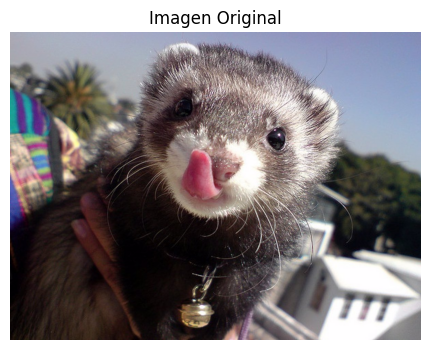

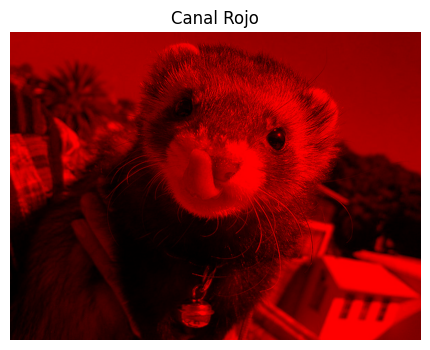

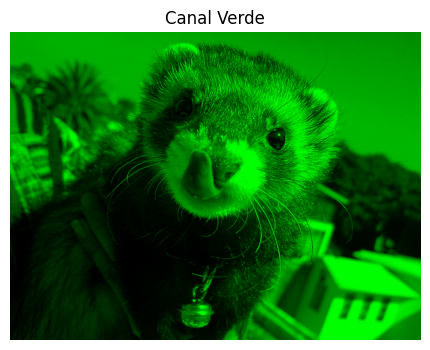

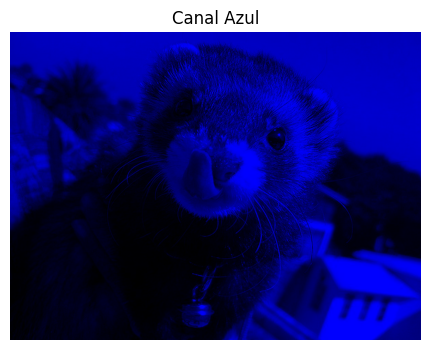

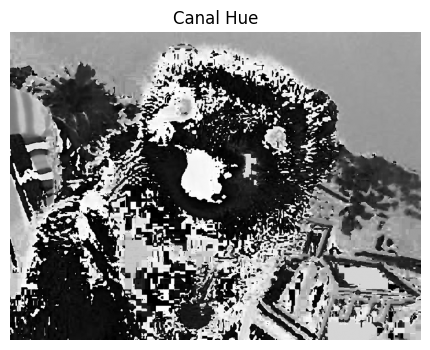

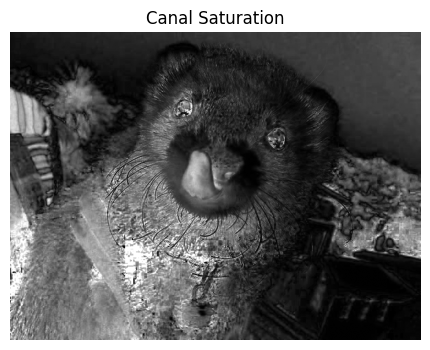

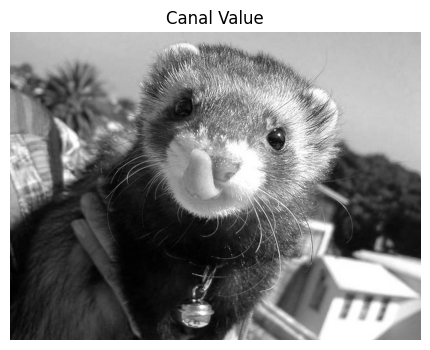

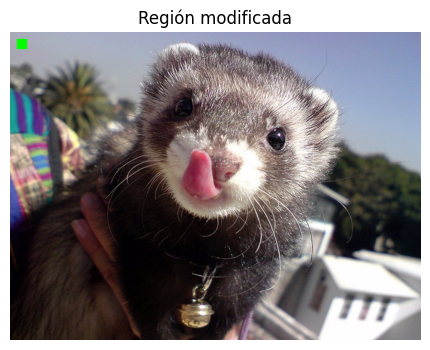

interactive(children=(IntSlider(value=100, description='Contraste', max=300, min=10, step=10), IntSlider(value…


 Histograma Original:


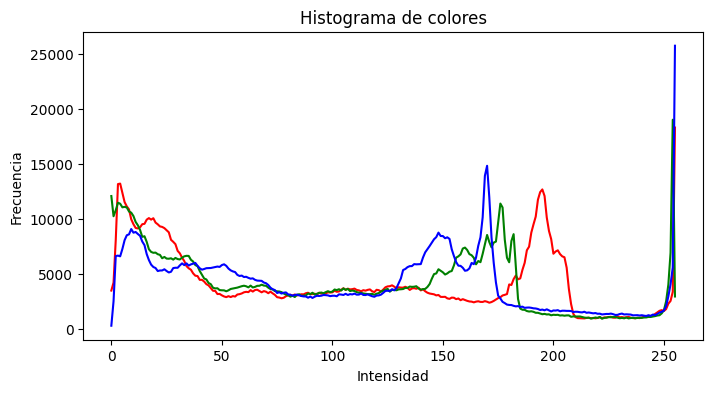

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import urllib.request
from ipywidgets import interact, IntSlider

# Cargar imagen desde URL
def obtener_imagen(fuente=None, color=True):
    url = fuente or "https://img.europapress.es/fotoweb/fotonoticia_20141117170037_1200.jpg"
    with urllib.request.urlopen(url) as resp:
        data = np.asarray(bytearray(resp.read()), dtype=np.uint8)
        flags = cv2.IMREAD_COLOR if color else cv2.IMREAD_GRAYSCALE
        imagen = cv2.imdecode(data, flags)

    if imagen is None:
        raise IOError("Error al cargar la imagen.")
    return imagen

img_bgr = obtener_imagen()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


# Funciones de visualización
def mostrar_imagen(titulo, imagen):
    plt.figure(figsize=(6, 4))
    plt.title(titulo)
    plt.axis('off')
    plt.imshow(imagen, cmap='gray' if len(imagen.shape) == 2 else None)
    plt.show()

def mostrar_histograma(imagen_rgb):
    colores = ('r', 'g', 'b')
    plt.figure(figsize=(8, 4))
    plt.title("Histograma de colores")
    for i, color in enumerate(colores):
        hist = cv2.calcHist([imagen_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.show()


# Mostrar imagen y canales
mostrar_imagen("Imagen Original", img_rgb)

# Mostrar canales RGB
canales_rgb = cv2.split(img_rgb)
for i, color in enumerate(('Rojo', 'Verde', 'Azul')):
    canal = np.zeros_like(img_rgb)
    canal[:, :, i] = canales_rgb[i]
    mostrar_imagen(f'Canal {color}', canal)


# Espacio HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(img_hsv)
mostrar_imagen("Canal Hue", h)
mostrar_imagen("Canal Saturation", s)
mostrar_imagen("Canal Value", v)


# Modificación de imagen (subregión coloreada)
def modificar_region(imagen, x1, y1, x2, y2, color=(0, 255, 0)):
    modificada = imagen.copy()
    modificada[y1:y2, x1:x2] = color
    return modificada

img_modificada = modificar_region(img_rgb, 20, 20, 50, 50, (0, 255, 0))
mostrar_imagen("Región modificada", img_modificada)

# Brillo y Contraste
def ajustar_brillo_contraste(img_rgb, alpha=1.0, beta=0):
    # alpha: contraste [1.0–3.0], beta: brillo [-100–100]
    img_adjusted = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)
    return img_adjusted


# Interactividad con sliders
@interact(Contraste=IntSlider(min=10, max=300, step=10, value=100),
          Brillo=IntSlider(min=-100, max=100, step=10, value=0))
def actualizar(Contraste, Brillo):
    alpha = Contraste / 100  # Normalizar contraste
    beta = Brillo
    ajustada = ajustar_brillo_contraste(img_rgb, alpha, beta)
    mostrar_imagen(f"Contraste: {alpha:.2f}, Brillo: {beta}", ajustada)
    mostrar_histograma(ajustada)


# Mostrar histograma original
print("\n", "Histograma Original:")
mostrar_histograma(img_bgr)
